# Inline matplotlib animation in notebook

In this example, we use the timer widget to drive a matplotlib animation. The module provides a gen_widget method that renders a matplotlib animation into the notebook.

This function is a direct application of the 'DoubleBufferingViewer' example of the [basic example notebook](basic.ipynb).

The javascript timer is connected to a method that ask to the matplotlib animation to process the next frame. Then the matplotlib figure is rendered into a Jupyter Image Widget.

Note, this [method](https://jakevdp.github.io/blog/2013/06/01/ipython-notebook-javascript-python-communication/) is very similar. The difference is the use of the Jupyter widgets to encapsulate the javascript code. It hides the javascript and make the code more reusable and shareable.

__Todo__: Patch matplotlib Animation class with  the gen_widget method to change the HTML representation. 

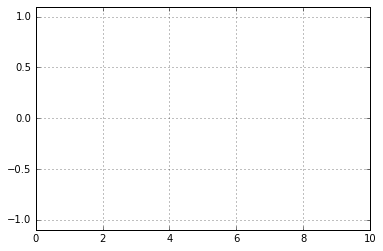

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from animationwidget.matplotlibanim import gen_widget


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = gen_widget(animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init))